In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rate', 'timestamp']

In [8]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [9]:
df.head()

,user_id,item_id,rate,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [11]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df = pd.merge(df, movie_titles, on='item_id')

In [13]:
df.head()

,user_id,item_id,rate,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [15]:
sns.set_style('white')

In [19]:
df.groupby('title')['rate'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rate, dtype: float64

In [20]:
df.groupby('title')['rate'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rate, dtype: int64

In [21]:
rating = pd.DataFrame(df.groupby('title')['rate'].mean())

In [23]:
rating.head()

,rate
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
rating['num_of_rating'] = pd.DataFrame(df.groupby('title')['rate'].count())

In [25]:
rating.head()

,rate,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

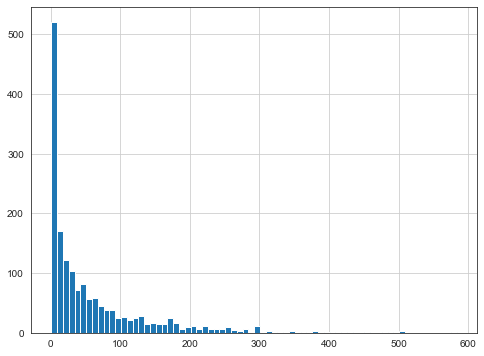

In [31]:
plt.figure(figsize=(8,6))
rating['num_of_rating'].hist(bins=70)

<AxesSubplot:>

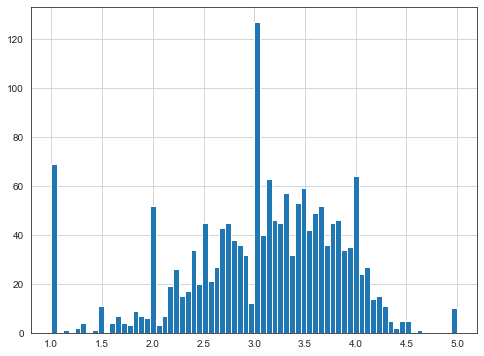

In [32]:
plt.figure(figsize=(8,6))
rating['rate'].hist(bins=70)

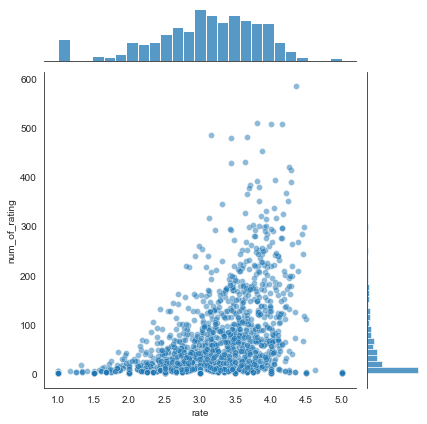

In [34]:
sns.jointplot(x = 'rate', y = 'num_of_rating', data=rating, alpha=0.5)

In [35]:
df.head()

,user_id,item_id,rate,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [36]:
moviemat = df.pivot_table(index='user_id', values='rate', columns='title')
# baraye tozihate in ghabeliyate `df.pivot_table()` mitavanim script ra motaale konim.
# dar vaghe ma inja dataframi dorost kardim ke neshan dahad har karbar be che film hayi emtiaz dade va be che film hayi 
# emtiaz nadade ast va che nomreyi ne che filmi dade ast..

In [37]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
rating['num_of_rating'].sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: num_of_rating, dtype: int64

In [40]:
starwars_user_rating = moviemat['Star Wars (1977)']
liarliar_user_rating = moviemat['Liar Liar (1997)']

In [41]:
starwars_user_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [43]:
similar_to_starwars = moviemat.corrwith(starwars_user_rating)
# algorithm corrwith dar vaghe eshterake beyne satrha va sotoon haye mokhtalefe beyne 2 seri az pandas ra misanjad
# yek algorithm digar ast be esme `corr` ke fekr konam mishavad faghat index ya sotoone 2 seri ra baham moghayese kard
# ama dar in algorithm rabete beyne index va sotoone 2 seri ra moghyese krdim

In [50]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [51]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_rating)
# algorithm corrwith dar vaghe eshterake beyne satrha va sotoon haye mokhtalefe beyne 2 seri az pandas ra misanjad

C:\Users\Nima\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Nima\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [54]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
# data frame film hayi ke eshterak mokhatab ra darand ba film starwars dorost kardim va chon meghdare ziyadi az film ha bedoone
# emtiaz bood tamami vazhhe eshterakate bedoone meghdar ra dropna kardim

In [55]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [56]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
# data frame film hayi ke eshterak mokhatab ra darand ba film liarliar dorost kardim va chon meghdare ziyadi az film ha bedoone
# emtiaz bood tamami vazhhe eshterakate bedoone meghdar ra dropna kardim

In [59]:
corr_starwars.sort_values(by = 'Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [60]:
corr_starwars = corr_starwars.join(rating['num_of_rating'])
# meghdare `num_of_rating` ra ezafe kardim baraye in ke shayad yek karbar be filmi meghdare 5 ro dade bashad faghat
# dar in soorat in emtiaz arzeshe chandani nadarad pas ma tedade karbarani ke be film ha emtiaz dade and ra ezafe mikonim
# ba estefade az methode `join`

In [61]:
corr_starwars.head()

,Correlation,num_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [64]:
corr_starwars[corr_starwars['num_of_rating'] > 100].sort_values('Correlation', ascending=False).head()
# meghdare 100 azanja bedast amad ke taghriban aksare film ha kamtar az 100 nafar be anha emtiaz dade bood
# ba tavajo be nemoodar hayi ke avale in safhe bedast avardim, pas ma baraye pishnahad dehi behtar filter 
# adade 100 ra gozashtim ke yani ba tavajo be film hayi ke karbaran bishtar az 100 karbar be anha emtiaz dade moghayese kon.

,Correlation,num_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [66]:
corr_liarliar = corr_liarliar.join(rating['num_of_rating'])

In [72]:
corr_liarliar[corr_liarliar['num_of_rating'] > 100].sort_values('Correlation', ascending=False).head(10)
# meghdare 100 azanja bedast amad ke taghriban aksare film ha kamtar az 100 nafar be anha emtiaz dade bood
# ba tavajo be nemoodar hayi ke avale in safhe bedast avardim, pas ma baraye pishnahad dehi behtar filter 
# adade 100 ra gozashtim ke yani ba tavajo be film hayi ke karbaran bishtar az 100 karbar be anha emtiaz dade moghayese kon.

,Correlation,num_of_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


In [ ]:
# dar in dars toonestim afradi ke be 2 film starwars va liarliar nomre dade boodand ro eshterakeshan ba baghye film hara
# bedast avardim bar asase tedad afarde moshtaraki ke emtiaz dade boodand. in yel system recommender sade hast ke 
# ba estefade az khosoosiyate pandas va methode corr ya corrwith mitavanim eshterakate beyne 2 serie ra bedast avarim...